In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [65]:
data=pd.read_csv(r"/content/export-rabat0.csv",header=3)

In [66]:
data.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C
0,2009-01-01,19,14,15,14,18,15,2.7,89,9.625,...,176,113,113,0,4,10.0,météo favorable,NaN,NaN,NaN
1,2009-01-02,16,14,16,14,15,15,2.8,83,9.875,...,116,122,353,0,4,5.0,météo défavorable,NaN,NaN,NaN
2,2009-01-03,16,14,28,14,15,15,6.4,86,9.750,...,116,296,353,0,3,8.3,météo correcte,NaN,NaN,NaN
3,2009-01-04,15,13,12,13,15,14,7.1,87,9.250,...,353,116,113,0,3,10.0,météo correcte,NaN,NaN,NaN
4,2009-01-05,15,12,10,12,15,14,3.3,88,9.250,...,176,176,176,0,3,10.0,météo correcte,NaN,NaN,NaN


In [67]:
data.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'OPINION', 'SUNSET', 'SUNRISE',
       'TEMPERATURE_NIGHT_C'],
      dtype='object')

In [68]:
data["target"] = data.shift(-1)["PRECIP_TOTAL_DAY_MM"]

In [69]:
data[['PRECIP_TOTAL_DAY_MM','target']]

,PRECIP_TOTAL_DAY_MM,target
0,2.7,2.8
1,2.8,6.4
2,6.4,7.1
3,7.1,3.3
4,3.3,3.8
...,...,...
5412,0.3,0.0
5413,0.0,0.0
5414,0.0,0.4
5415,0.4,0.1


In [70]:
data.isnull().sum()

DATE                         0
MAX_TEMPERATURE_C            0
MIN_TEMPERATURE_C            0
WINDSPEED_MAX_KMH            0
TEMPERATURE_MORNING_C        0
TEMPERATURE_NOON_C           0
TEMPERATURE_EVENING_C        0
PRECIP_TOTAL_DAY_MM          0
HUMIDITY_MAX_PERCENT         0
VISIBILITY_AVG_KM            0
PRESSURE_MAX_MB              0
CLOUDCOVER_AVG_PERCENT       0
HEATINDEX_MAX_C              0
DEWPOINT_MAX_C               0
WINDTEMP_MAX_C               0
WEATHER_CODE_MORNING         0
WEATHER_CODE_NOON            0
WEATHER_CODE_EVENING         0
TOTAL_SNOW_MM                0
UV_INDEX                     0
SUNHOUR                      0
OPINION                      0
SUNSET                    5417
SUNRISE                   5417
TEMPERATURE_NIGHT_C       5417
target                       1
dtype: int64

In [71]:
data.drop(['SUNSET','SUNRISE','TEMPERATURE_NIGHT_C'],inplace=True,axis=1)

In [72]:
data.duplicated().sum()

0

In [73]:
data.dtypes

DATE                       object
MAX_TEMPERATURE_C           int64
MIN_TEMPERATURE_C           int64
WINDSPEED_MAX_KMH           int64
TEMPERATURE_MORNING_C       int64
TEMPERATURE_NOON_C          int64
TEMPERATURE_EVENING_C       int64
PRECIP_TOTAL_DAY_MM       float64
HUMIDITY_MAX_PERCENT        int64
VISIBILITY_AVG_KM         float64
PRESSURE_MAX_MB             int64
CLOUDCOVER_AVG_PERCENT    float64
HEATINDEX_MAX_C             int64
DEWPOINT_MAX_C              int64
WINDTEMP_MAX_C              int64
WEATHER_CODE_MORNING        int64
WEATHER_CODE_NOON           int64
WEATHER_CODE_EVENING        int64
TOTAL_SNOW_MM               int64
UV_INDEX                    int64
SUNHOUR                   float64
OPINION                    object
target                    float64
dtype: object

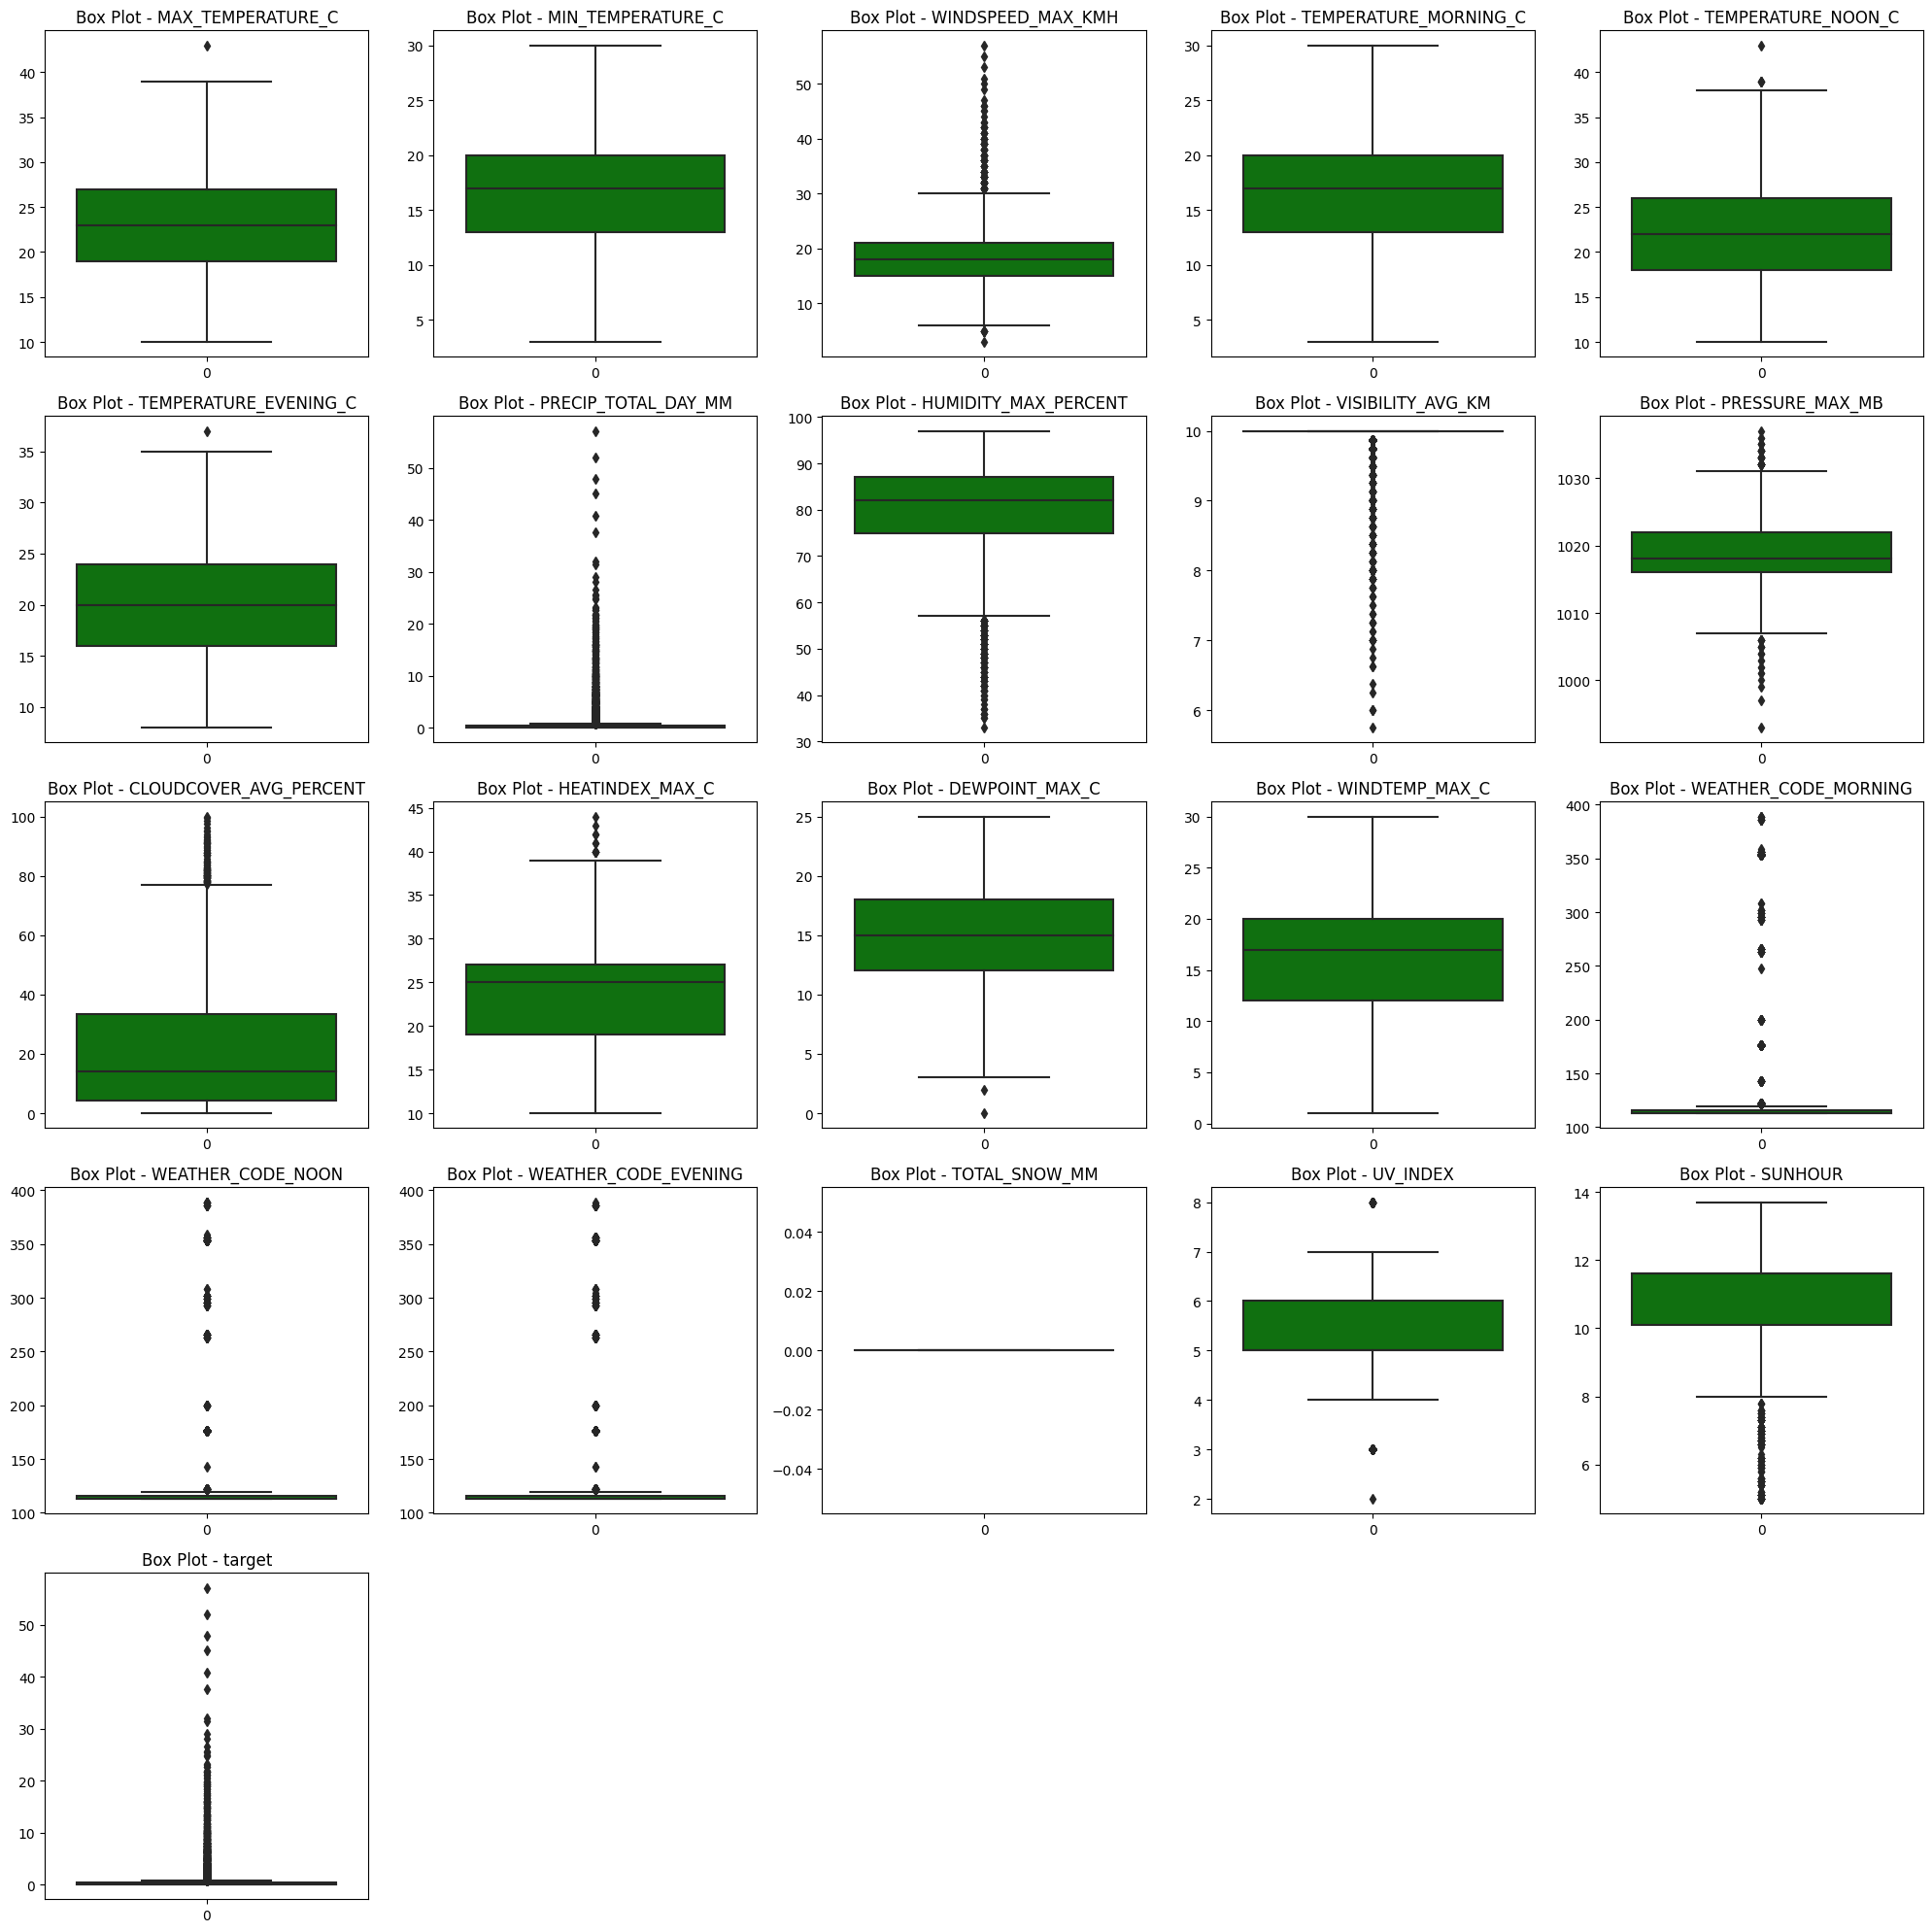

In [74]:
plt.figure(figsize=(20, 20))
for i,feat in enumerate(data.select_dtypes(exclude=[object]).columns):
    plt.subplot(5,5,i+1)
    sns.boxplot(data[feat],color='g')
    plt.title(f'Box Plot - {feat}')
plt.tight_layout()
plt.show()


In [75]:
data.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,target
count,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,...,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.0,5417.000000,5417.000000,5416.000000
mean,22.947203,16.574672,18.055750,16.589071,22.648145,20.022522,1.093096,79.568580,9.833695,1019.072734,...,23.779398,14.945173,16.261769,131.118516,127.574672,126.304227,0.0,5.349086,10.681687,1.092799
std,5.036845,4.413790,5.533088,4.409338,5.161988,4.740560,3.333120,10.715096,0.447870,4.826712,...,5.495657,3.919866,4.834193,55.144469,48.884911,46.552381,0.0,1.121404,1.397775,3.333356
min,10.000000,3.000000,3.000000,3.000000,10.000000,8.000000,0.000000,33.000000,5.750000,993.000000,...,10.000000,0.000000,1.000000,113.000000,113.000000,113.000000,0.0,2.000000,5.000000,0.000000
25%,19.000000,13.000000,15.000000,13.000000,18.000000,16.000000,0.000000,75.000000,10.000000,1016.000000,...,19.000000,12.000000,12.000000,113.000000,113.000000,113.000000,0.0,5.000000,10.100000,0.000000
50%,23.000000,17.000000,18.000000,17.000000,22.000000,20.000000,0.000000,82.000000,10.000000,1018.000000,...,25.000000,15.000000,17.000000,113.000000,113.000000,113.000000,0.0,5.000000,11.600000,0.000000
75%,27.000000,20.000000,21.000000,20.000000,26.000000,24.000000,0.300000,87.000000,10.000000,1022.000000,...,27.000000,18.000000,20.000000,116.000000,116.000000,116.000000,0.0,6.000000,11.600000,0.300000
max,43.000000,30.000000,57.000000,30.000000,43.000000,37.000000,57.100000,97.000000,10.000000,1037.000000,...,44.000000,25.000000,30.000000,389.000000,389.000000,389.000000,0.0,8.000000,13.700000,57.100000


<ipython-input-76-3dbf7336d00d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


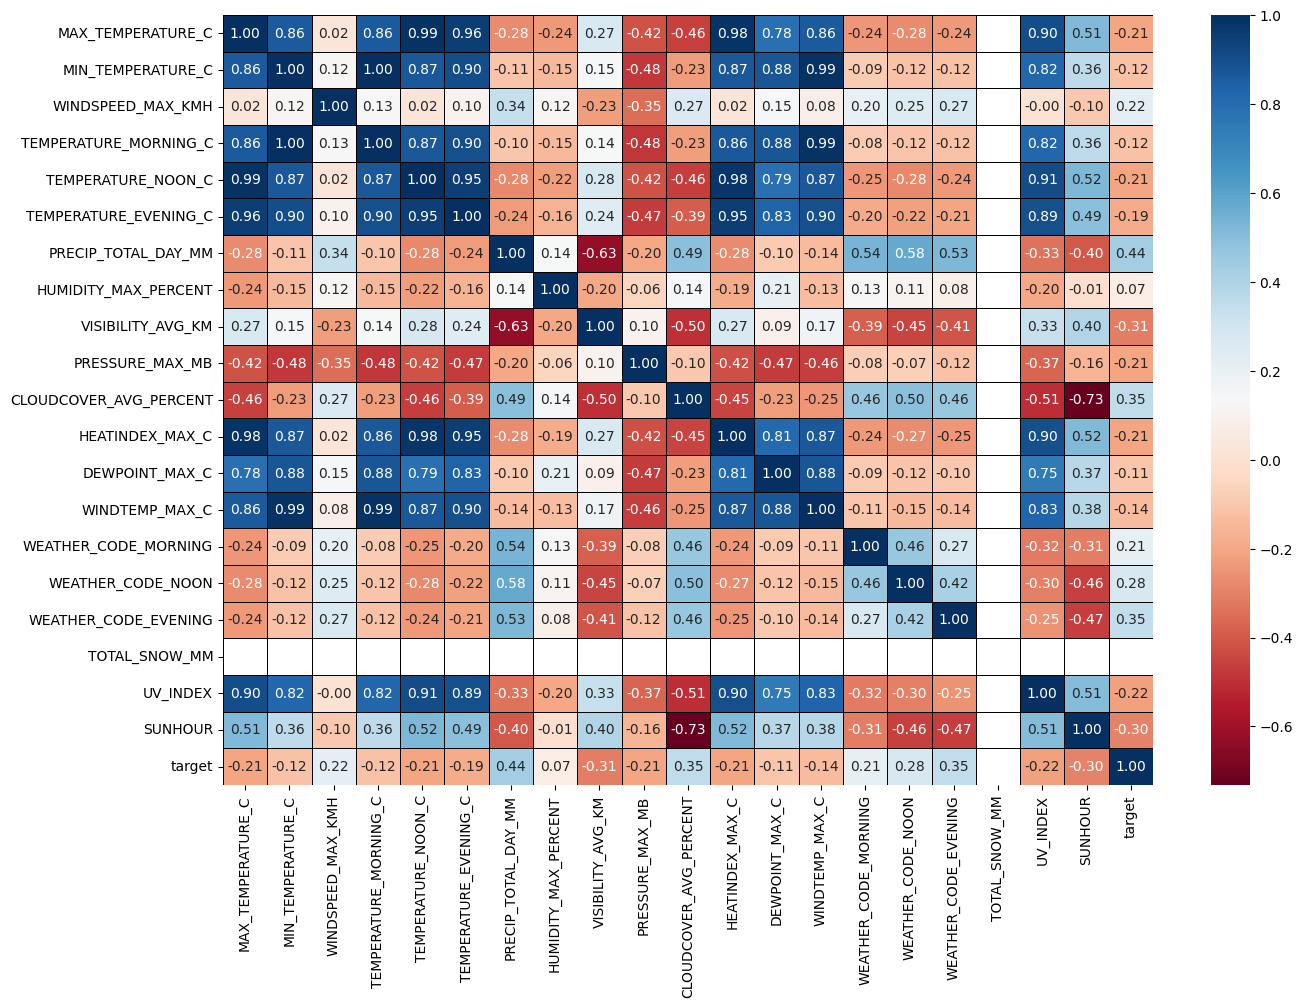

In [76]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(15,10))
# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, cmap="RdBu", annot=True, fmt=".2f", linewidths=0.5, linecolor="black")

# Show the plot
plt.show()

In [77]:
data.drop(['TOTAL_SNOW_MM'],inplace=True,axis=1)

In [78]:
data.drop(['TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C','TEMPERATURE_EVENING_C','HEATINDEX_MAX_C','DEWPOINT_MAX_C','WINDTEMP_MAX_C','UV_INDEX','OPINION','DATE'],inplace=True,axis=1)

In [79]:
data.drop(['WEATHER_CODE_MORNING','WEATHER_CODE_NOON'],inplace=True,axis=1)

In [80]:
data.drop(['WEATHER_CODE_EVENING'],inplace=True,axis=1)


In [81]:
data.drop(['SUNHOUR'],inplace=True,axis=1)

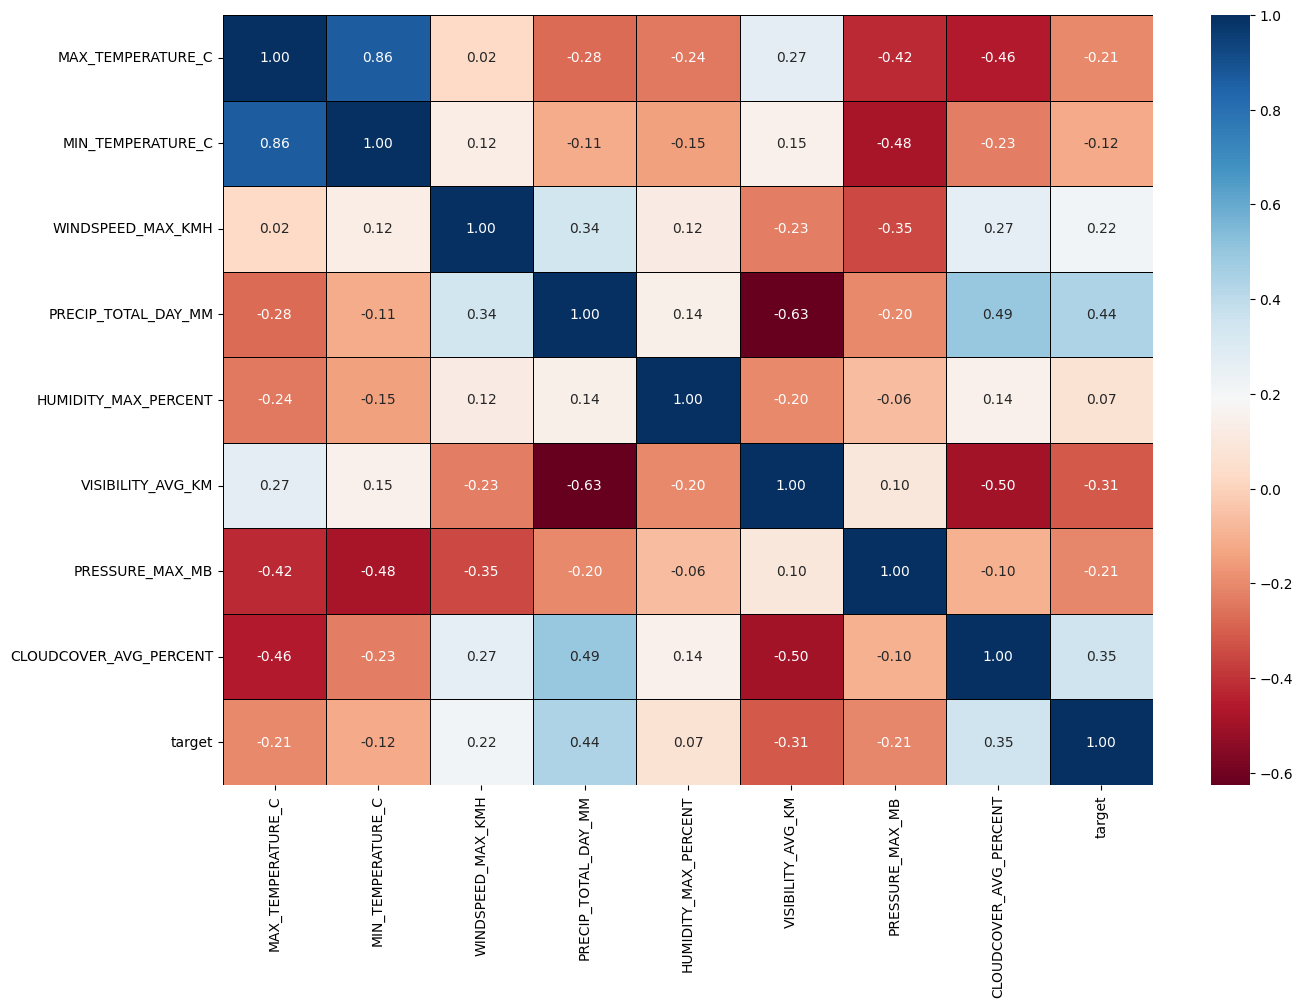

In [82]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(15,10))
# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, cmap="RdBu", annot=True, fmt=".2f", linewidths=0.5, linecolor="black")

# Show the plot
plt.show()

In [83]:
data.isnull().sum()

MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
WINDSPEED_MAX_KMH         0
PRECIP_TOTAL_DAY_MM       0
HUMIDITY_MAX_PERCENT      0
VISIBILITY_AVG_KM         0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
target                    1
dtype: int64

In [84]:
data.head()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,target
0,19,14,15,2.7,89,9.625,1024,23.875,2.8
1,16,14,16,2.8,83,9.875,1023,67.125,6.4
2,16,14,28,6.4,86,9.750,1023,55.625,7.1
3,15,13,12,7.1,87,9.250,1021,35.375,3.3
4,15,12,10,3.3,88,9.250,1020,38.875,3.8


In [85]:
data.target.iloc[-1]

nan

In [86]:
data.dropna(axis = 0,inplace=True)

In [87]:
data.isnull().sum()

MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
WINDSPEED_MAX_KMH         0
PRECIP_TOTAL_DAY_MM       0
HUMIDITY_MAX_PERCENT      0
VISIBILITY_AVG_KM         0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
target                    0
dtype: int64

In [88]:
data.dtypes

MAX_TEMPERATURE_C           int64
MIN_TEMPERATURE_C           int64
WINDSPEED_MAX_KMH           int64
PRECIP_TOTAL_DAY_MM       float64
HUMIDITY_MAX_PERCENT        int64
VISIBILITY_AVG_KM         float64
PRESSURE_MAX_MB             int64
CLOUDCOVER_AVG_PERCENT    float64
target                    float64
dtype: object

In [89]:
data['target'] = data['target'].fillna(0).apply(lambda x: 1 if x >0 else 0)

In [90]:
data.target.value_counts()

0    3597
1    1819
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7d27d5e731c0>,
 [Text(-0.5424308364626277, 0.95695809085584, ' not rain'),
  Text(0.5424308364626271, -0.9569580908558403, ' rain')])

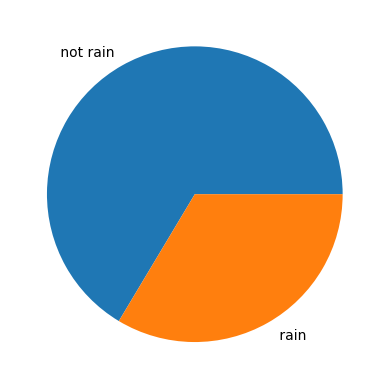

In [91]:
plt.pie(data.target.value_counts(),labels=[" not rain", " rain"])

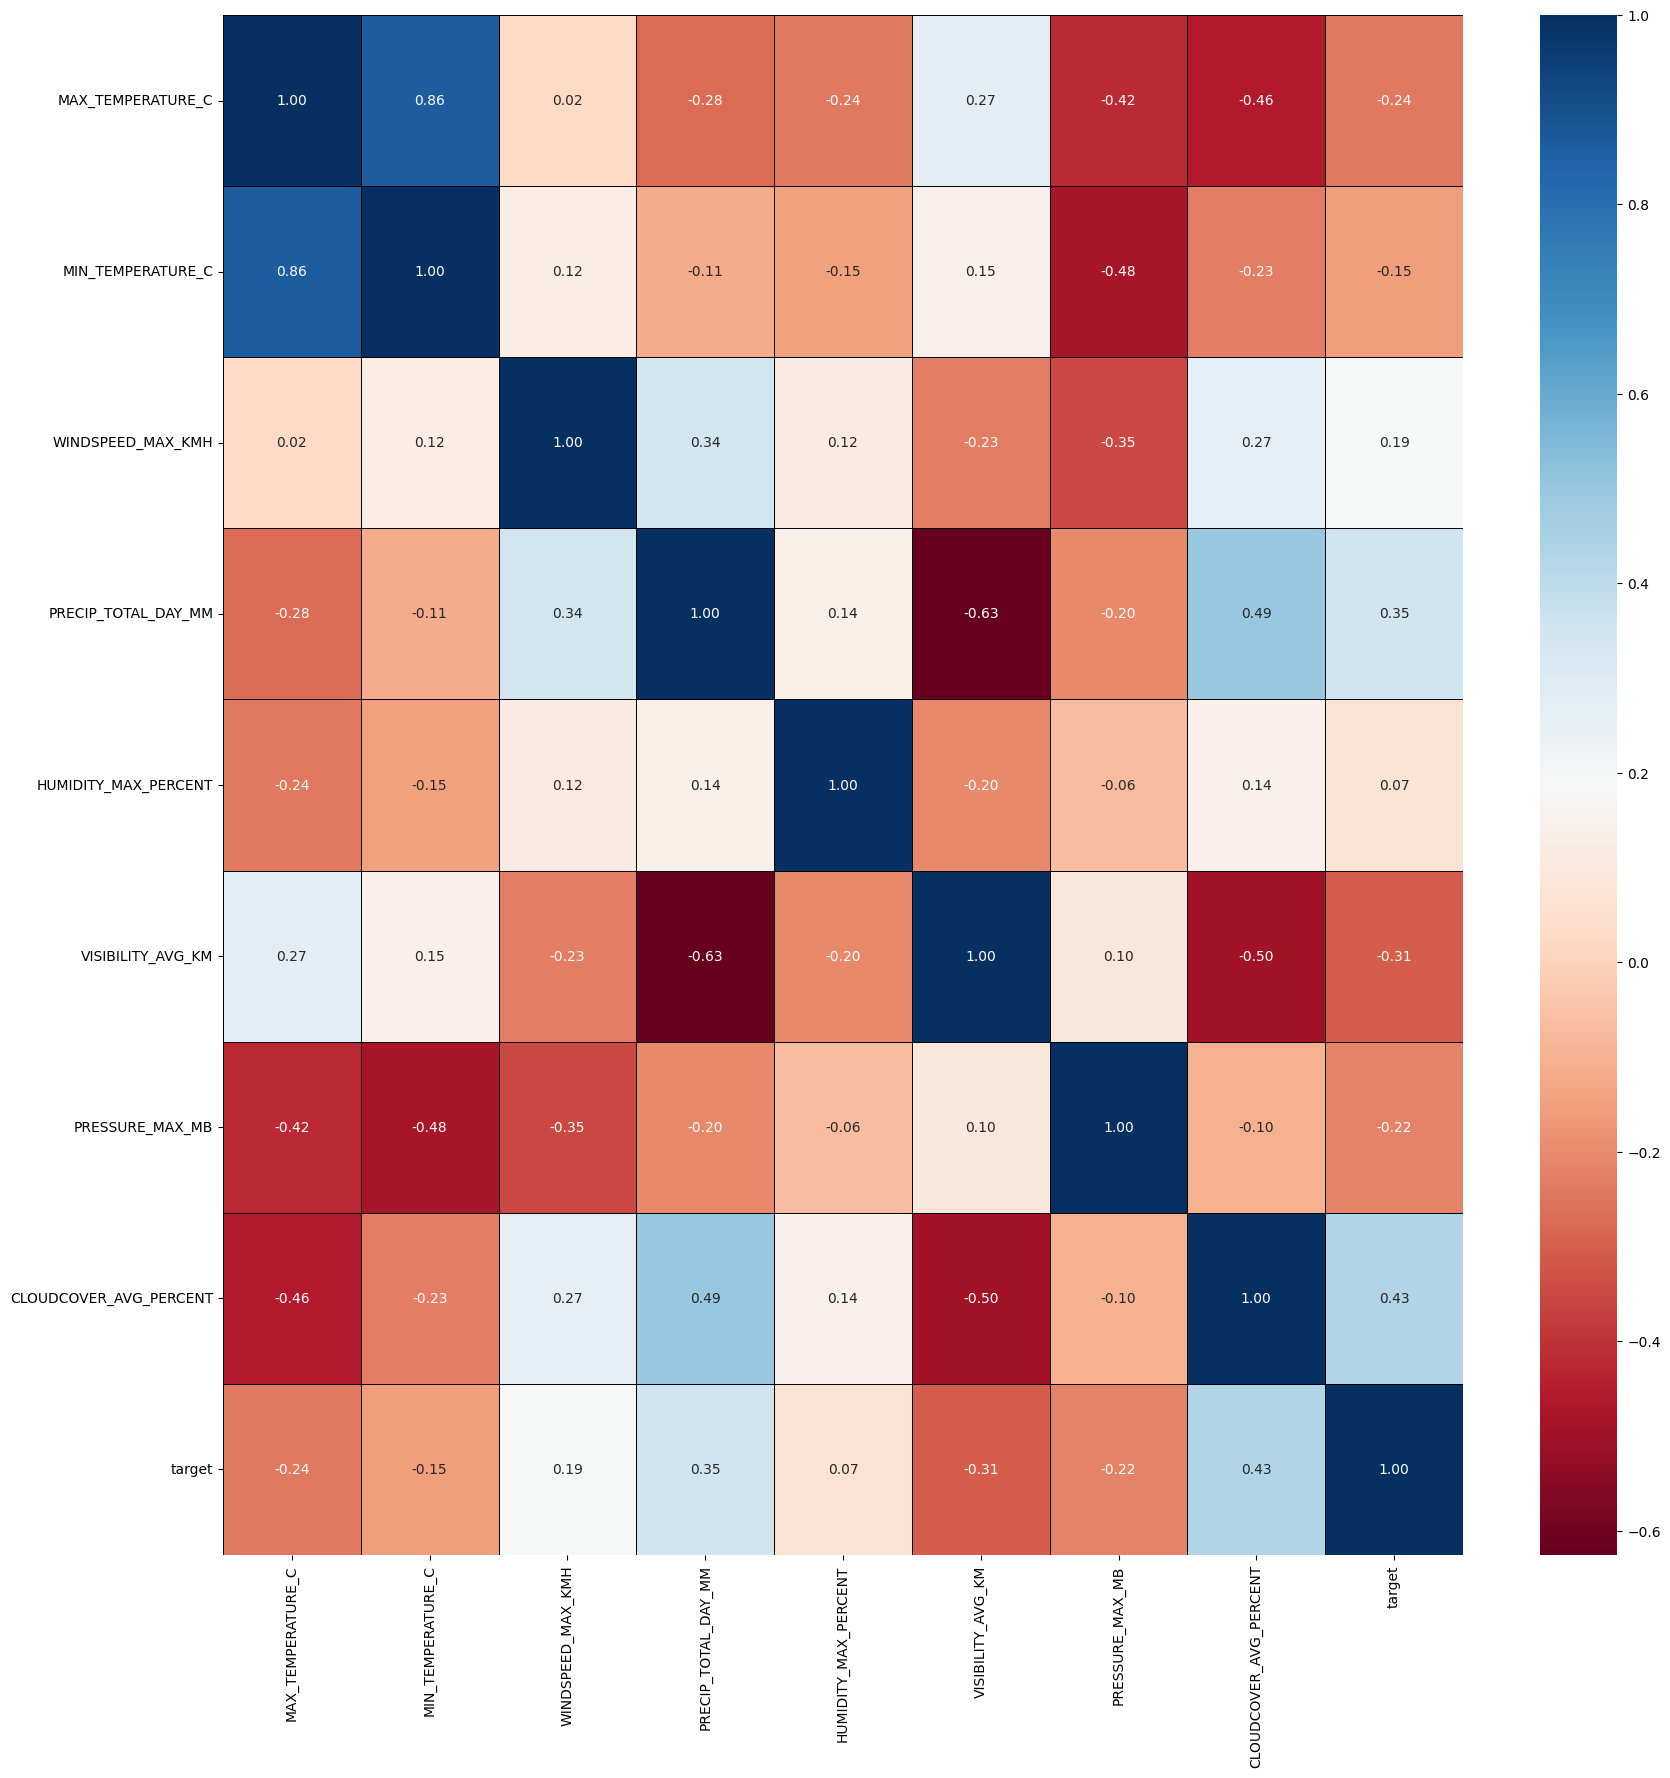

In [92]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(20, 20))
# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, cmap="RdBu", annot=True, fmt=".2f", linewidths=0.5, linecolor="black")

# Show the plot
plt.show()

In [93]:
x=data.drop(['target'],axis=1)
y=data['target']

In [94]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x)

In [95]:
#normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x2= scaler.fit_transform(x)

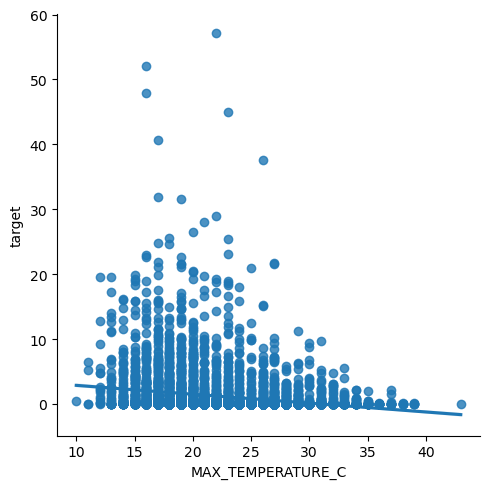

In [ ]:
sns.lmplot(x='MAX_TEMPERATURE_C',y='target',data=data)

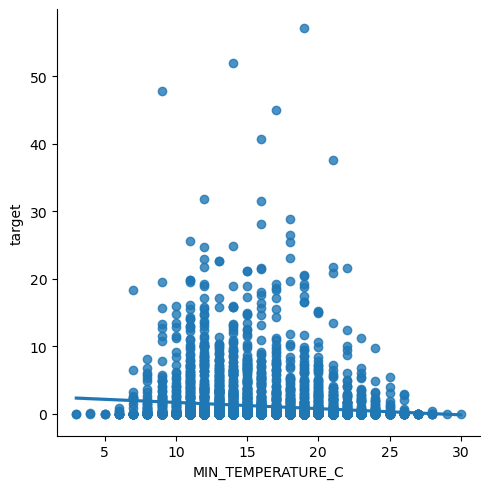

In [ ]:
sns.lmplot(x='MIN_TEMPERATURE_C',y='target',data=data)

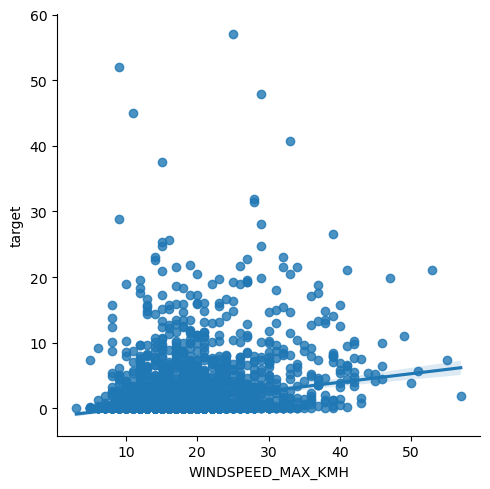

In [ ]:
sns.lmplot(x='WINDSPEED_MAX_KMH',y='target',data=data)

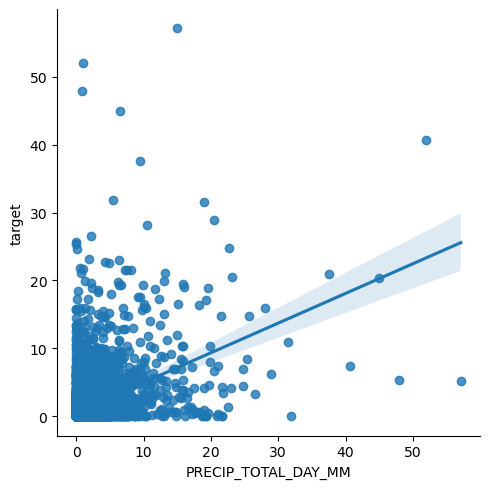

In [ ]:
sns.lmplot(x='PRECIP_TOTAL_DAY_MM',y='target',data=data)

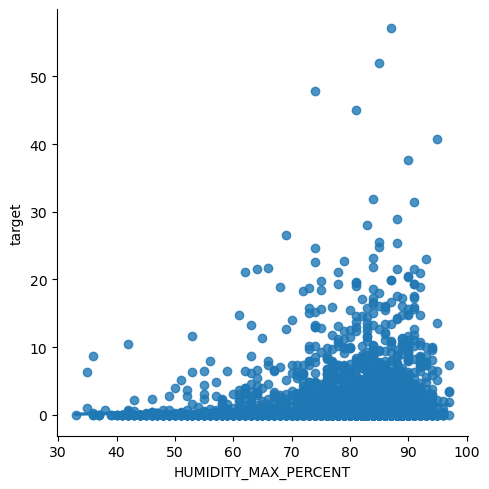

In [ ]:
sns.lmplot(x='HUMIDITY_MAX_PERCENT',y='target',data=data)

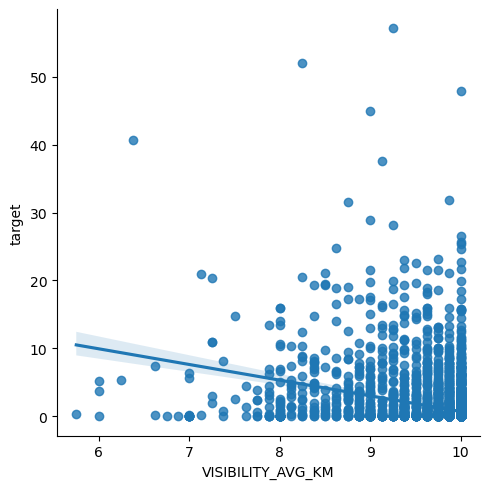

In [ ]:
sns.lmplot(x='VISIBILITY_AVG_KM',y='target',data=data)

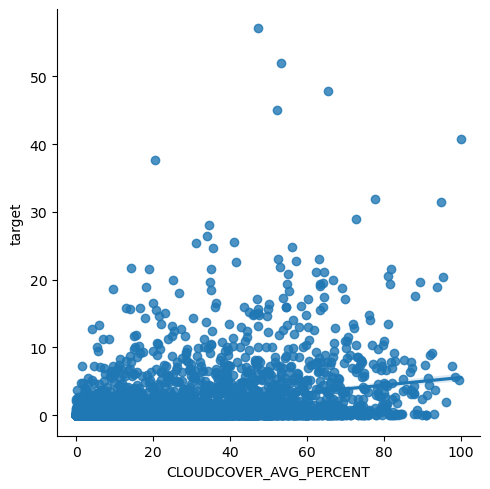

In [ ]:
sns.lmplot(x='CLOUDCOVER_AVG_PERCENT',y='target',data=data)

In [96]:

#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [97]:

#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [99]:
weights=['uniform', 'distance']
algo=['auto', 'ball_tree', 'kd_tree', 'brute']
parameters = {'n_neighbors': list(range(1, 31)),
              'weights':weights ,
              'algorithm': algo

             }

In [100]:
clf0=KNeighborsClassifier()
# Run the grid search
grid_obj = GridSearchCV(clf0, parameters,cv=5)
grid_obj = grid_obj.fit(X_train2, y_train)


In [101]:
print(grid_obj.best_score_)
print(grid_obj.best_params_)

0.7698538401911504
{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'uniform'}


In [103]:
clf0=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 23, weights= 'distance')
clf0.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=23, weights='distance')

[[688  49]
 [187 160]]


<Axes: >

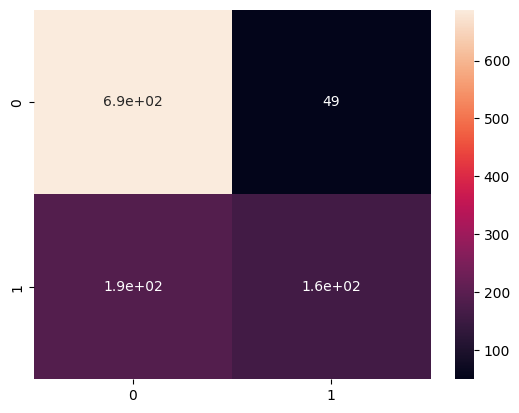

In [104]:
y_pred = clf0.predict(X_test2)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

<BarContainer object of 1 artists>

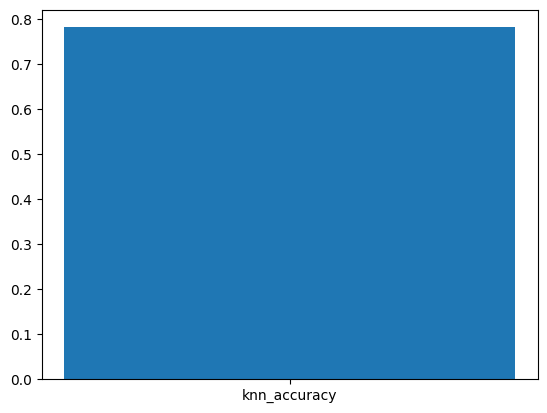

In [105]:
from sklearn.metrics import accuracy_score
plt.bar('knn_accuracy',accuracy_score(y_test, y_pred))

In [108]:
from sklearn.ensemble import RandomForestClassifier
# Choose the type of classifier.
clf = RandomForestClassifier()
# Choose some parameter combinations to try
parameters = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, cv=5)
grid_obj = grid_obj.fit(X_train1, y_train)
print(grid_obj.best_score_)
print(grid_obj.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

0.8024026999741617
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}


In [109]:
clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', n_estimators= 500)
clf.fit(X_train1, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)

[[659  78]
 [145 202]]


<Axes: >

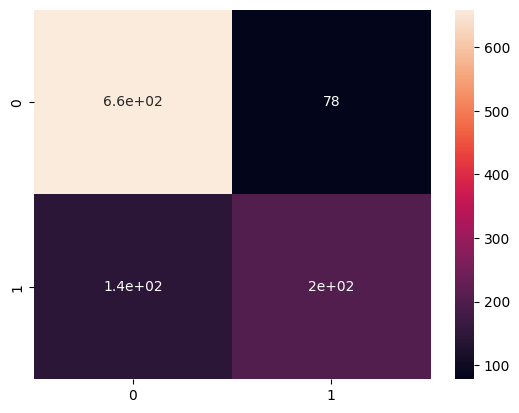

In [110]:
y_pred1 = clf.predict(X_test1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)
sns.heatmap(cm, annot=True)

<BarContainer object of 1 artists>

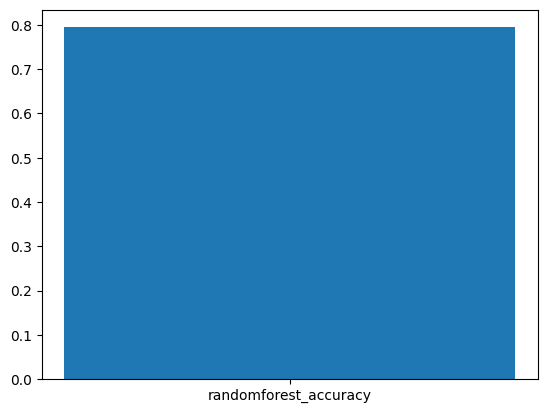

In [111]:
from sklearn.metrics import accuracy_score
plt.bar('randomforest_accuracy',accuracy_score(y_test, y_pred1))

In [123]:
import pickle
with open('rain_predictor.pkl','wb') as file:
  pickle.dump(clf,file)


In [112]:
from sklearn import svm
clf1 = svm.SVC()
degree=[1,2,3,4]
kernel=['linear', 'rbf', 'sigmoid']
gamma=['scale', 'auto']
parameters = {'kernel':kernel,
              'degree':degree,
              'gamma':gamma
             }

grid_obj = GridSearchCV(clf1, parameters, cv=5)
grid_obj = grid_obj.fit(X_train2, y_train)
print(grid_obj.best_score_)
print(grid_obj.best_params_)

0.7751608237371841
{'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [113]:
clf1 = svm.SVC(kernel= 'rbf', gamma= 'scale', degree= 1)
clf1.fit(X_train2, y_train)

SVC(degree=1)

[[687  50]
 [192 155]]


<Axes: >

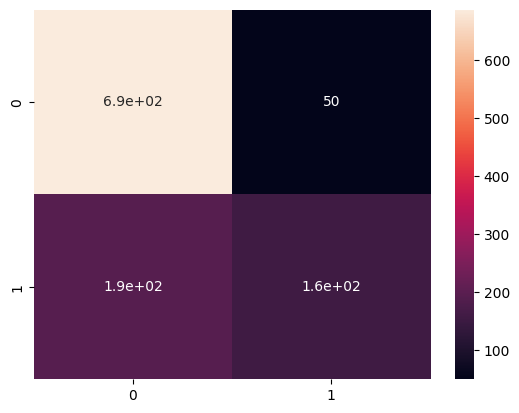

In [114]:
y_pred2 = clf1.predict(X_test2)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm)
sns.heatmap(cm, annot=True)

<BarContainer object of 1 artists>

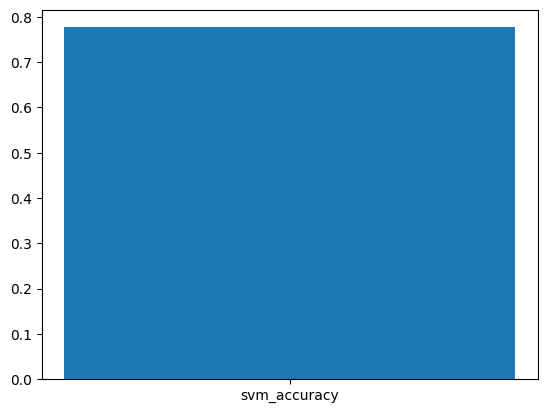

In [115]:
from sklearn.metrics import accuracy_score
plt.bar('svm_accuracy',accuracy_score(y_test, y_pred2))

In [116]:
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
}

In [117]:
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train2, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
0.7957063711911356
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}


In [119]:
clf2 = XGBClassifier(n_estimators=100 , max_depth= 4, learning_rate= 0.05)
clf2.fit(X_train2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[[657  80]
 [145 202]]


<Axes: >

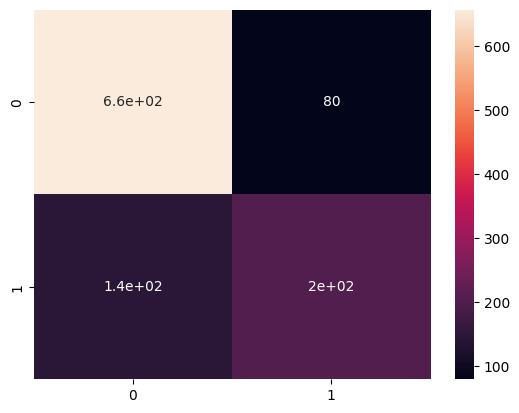

In [120]:
y_pred3 = clf2.predict(X_test2)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
print(cm)
sns.heatmap(cm, annot=True)

<BarContainer object of 1 artists>

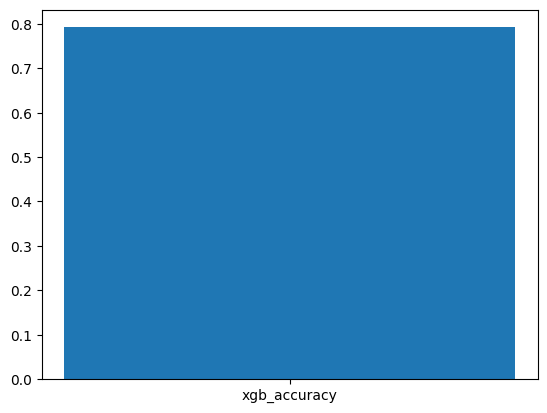

In [121]:
from sklearn.metrics import accuracy_score
plt.bar('xgb_accuracy',accuracy_score(y_test, y_pred3))

<BarContainer object of 4 artists>

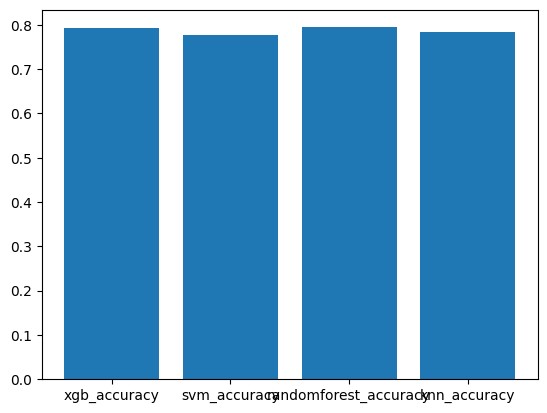

In [122]:
plt.bar(['xgb_accuracy','svm_accuracy','randomforest_accuracy','knn_accuracy'],[accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred)])